In [1]:
library(DESeq2)
library(RColorBrewer)
library(gplots)
library(tximport)
source('../extra_scripts/plotPCAWithSampleNames.R')
source('../extra_scripts/overLapper_original.R')

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [2]:
dir="../salmon_denovo_by_species"
files_list = list.files("../salmon_denovo_by_species/A_xenica")
files <- file.path(dir,"A_xenica",files_list, "quant.sf")
files
print(file.exists(files))

[1] "../salmon_denovo_by_species/A_xenica/A_xenica_BW_1.quant/quant.sf"      
[2] "../salmon_denovo_by_species/A_xenica/A_xenica_BW_2.quant/quant.sf"      
[3] "../salmon_denovo_by_species/A_xenica/A_xenica_BW_3.quant/quant.sf"      
[4] "../salmon_denovo_by_species/A_xenica/A_xenica_FW_1.quant/quant.sf"      
[5] "../salmon_denovo_by_species/A_xenica/A_xenica_FW_2.quant/quant.sf"      
[6] "../salmon_denovo_by_species/A_xenica/A_xenica_FW_3.quant/quant.sf"      
[7] "../salmon_denovo_by_species/A_xenica/A_xenica_transfer_1.quant/quant.sf"
[8] "../salmon_denovo_by_species/A_xenica/A_xenica_transfer_2.quant/quant.sf"
[9] "../salmon_denovo_by_species/A_xenica/A_xenica_transfer_3.quant/quant.sf"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE


In [4]:
contigs <- read.csv("~/Documents/UCDavis/Whitehead/intermediate_denovo_annotation_files/A_xenica_gene_transcript_table.txt")
dim(contigs)

[1] 362781      1

In [5]:
gene_names <- read.csv("~/Documents/UCDavis/Whitehead/annotation_gene_names/A_xenica_gene_names.csv")
dim(gene_names)
gene_names_id <- gene_names[,c(2,6)]
cols<-c("transcript_id","gene_id")
colnames(gene_names_id)<-cols

[1] 451127      7

In [6]:
tx2gene <- gene_names_id
txi.salmon <- tximport(files, type = "salmon", tx2gene = tx2gene)
dim(txi.salmon$counts)

reading in files with read_tsv
1 2 3 4 5 6 7 8 9 
removing duplicated transcript rows from tx2gene
summarizing abundance
summarizing counts
summarizing length


[1] 73458     9

In [6]:
cols<-files_list
colnames(txi.salmon$counts)<-cols
conditions = factor(c("BW","BW","BW","FW","FW","FW","TR","TR","TR"))
ExpDesign <- data.frame(row.names=colnames(txi.salmon$counts), condition = conditions)
ExpDesign

,condition
A_xenica_BW_1.quant,BW
A_xenica_BW_2.quant,BW
A_xenica_BW_3.quant,BW
A_xenica_FW_1.quant,FW
A_xenica_FW_2.quant,FW
A_xenica_FW_3.quant,FW
A_xenica_transfer_1.quant,TR
A_xenica_transfer_2.quant,TR
A_xenica_transfer_3.quant,TR


using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


Intercept
condition_FW_vs_BW
condition_TR_vs_BW


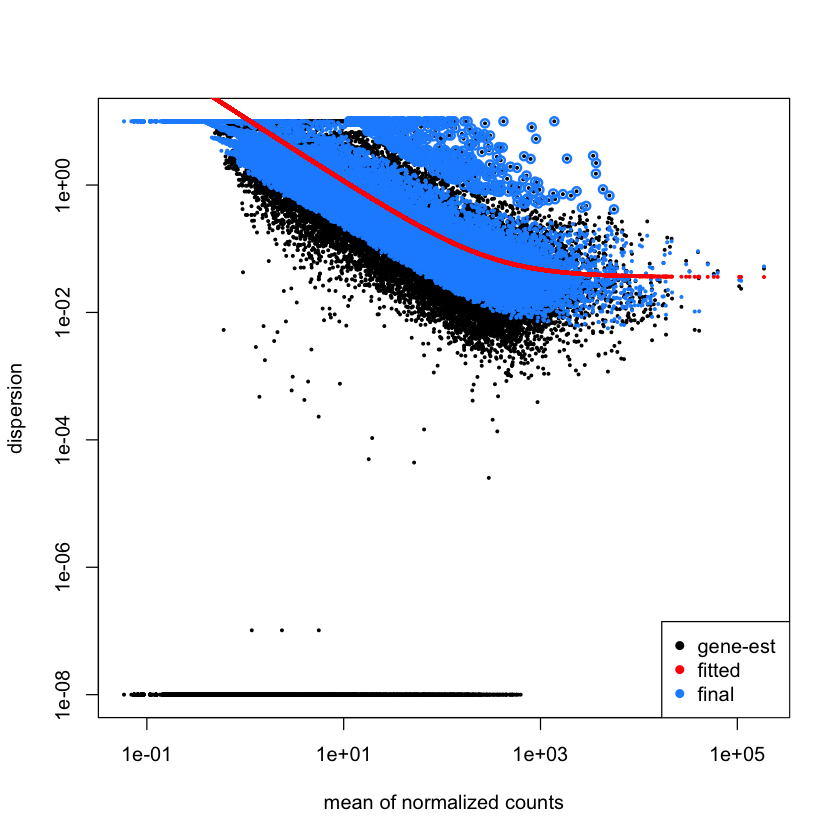

In [7]:
dds <- DESeqDataSetFromTximport(txi.salmon, ExpDesign, ~condition)
dds<-DESeq(dds,betaPrior=FALSE)
matrix(resultsNames(dds))
log_cds<-rlog(dds)
plotDispEsts(dds)


Attaching package: ‘genefilter’

The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars



Importance of components%s:
                           PC1     PC2     PC3     PC4     PC5      PC6
Standard deviation     21.1891 17.0037 15.9478 14.1059 13.8734 13.22284
Proportion of Variance  0.2384  0.1535  0.1351  0.1057  0.1022  0.09284
Cumulative Proportion   0.2384  0.3919  0.5270  0.6327  0.7349  0.82769
                            PC7      PC8       PC9
Standard deviation     13.15108 12.31025 1.607e-13
Proportion of Variance  0.09184  0.08047 0.000e+00
Cumulative Proportion   0.91953  1.00000 1.000e+00


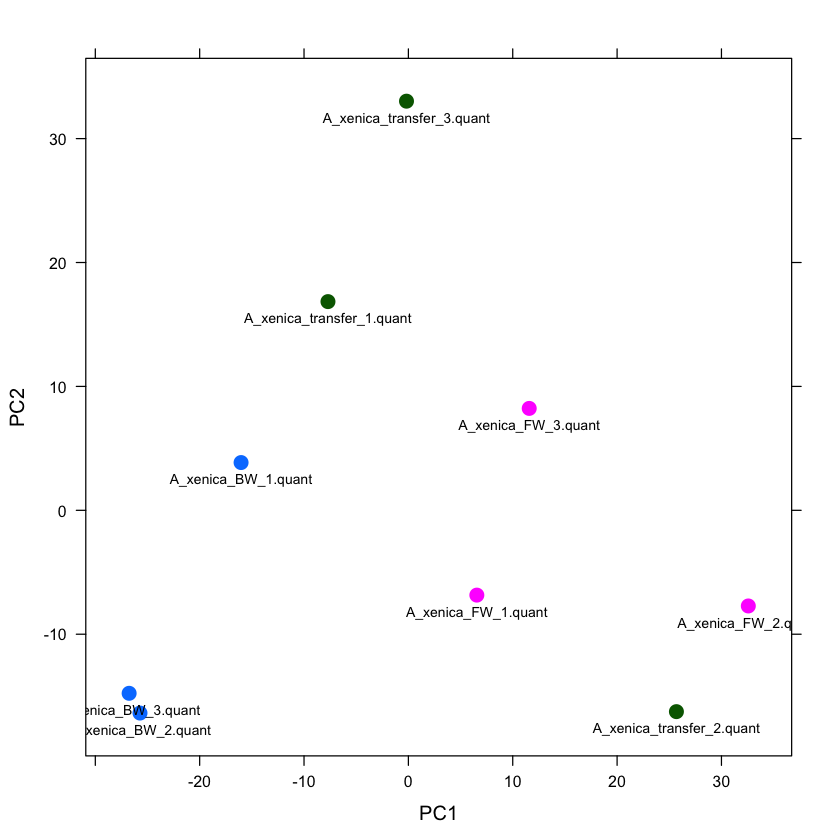

In [8]:
plotPCAWithSampleNames(log_cds,intgroup="condition",ntop=40000)

get counts

In [9]:
counts_table = counts(dds, normalized=TRUE )
dim(counts_table)

[1] 29421     9

After filtering for low expression (where th rowSum is greater than or equal to 1):

In [10]:
filtered_norm_counts<-counts_table[!rowSums(counts_table==0)>=1, ]
dim(filtered_norm_counts)
filtered_norm_counts<-as.data.frame(filtered_norm_counts)
GeneID<-rownames(filtered_norm_counts)
filtered_norm_counts<-cbind(filtered_norm_counts,GeneID)

[1] 18974     9

# MA plot, BW vs. FW

[1] 29421     6

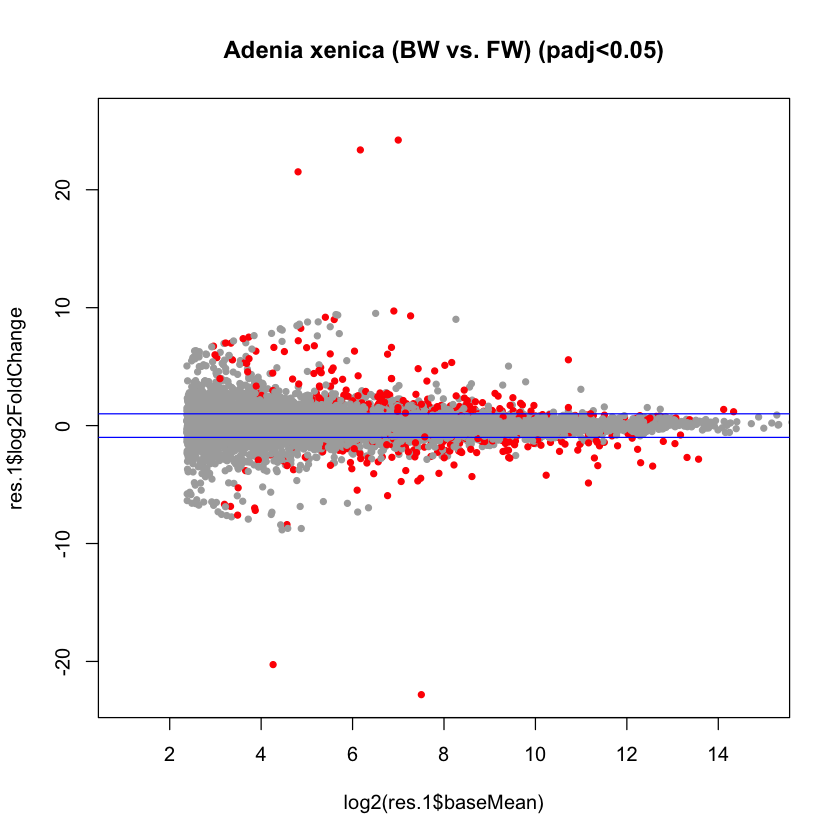

In [11]:
res.1<-results(dds,contrast=c("condition","BW","FW"))
dim(res.1)
res.2<-results(dds,contrast=c("condition","TR","FW"))
res.3<-results(dds,contrast=c("condition","TR","BW"))
res1_ordered <-as.data.frame(res.1[order(res.1$padj),])
res1_filtered <-subset(res1_ordered,res1_ordered$padj<0.05)
#res1_filtered <-subset(res1_filtered,res1_filtered$log2FoldChange>1 | res1_filtered$log2FoldChange< -1)
id<-rownames(res1_filtered)
res1_filtered<-cbind(res1_filtered,id)
res2_ordered <-as.data.frame(res.2[order(res.2$padj),])
res2_filtered<-subset(res2_ordered,res2_ordered$padj<0.05)
#res2_filtered <-subset(res2_filtered,res2_filtered$log2FoldChange>1 | res2_filtered$log2FoldChange< -1)
id<-rownames(res2_filtered)
res2_filtered<-cbind(res2_filtered,id)
res3_ordered<-as.data.frame(res.3[order(res.3$padj),])
res3_filtered<-subset(res3_ordered,res3_ordered$padj<0.05)
#res3_filtered <-subset(res3_filtered,res3_filtered$log2FoldChange>1 | res3_filtered$log2FoldChange< -1)
id<-rownames(res3_filtered)
res3_filtered<-cbind(res3_filtered,id)
plot(log2(res.1$baseMean), res.1$log2FoldChange, 
     col=ifelse(res.1$padj < 0.05, "red","gray67"),
     main="Adenia xenica (BW vs. FW) (padj<0.05)",xlim=c(1,15),pch=20,cex=1)
abline(h=c(-1,1), col="blue")

# MA plot, TR vs. FW

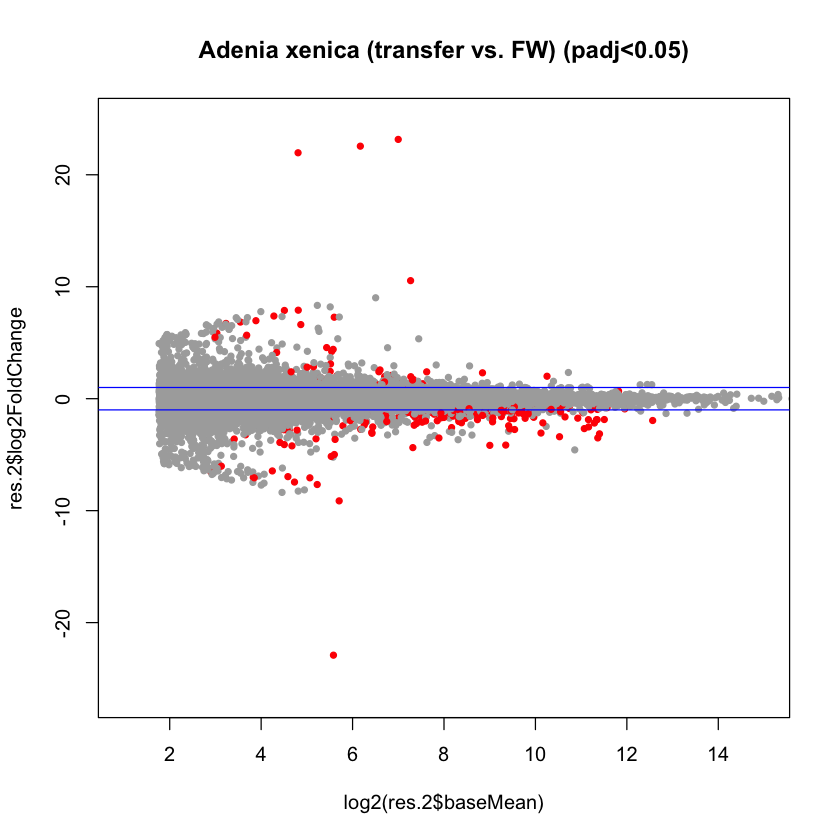

In [12]:
plot(log2(res.2$baseMean), res.2$log2FoldChange, 
     col=ifelse(res.2$padj < 0.05, "red","gray67"),
     main="Adenia xenica (transfer vs. FW) (padj<0.05)",xlim=c(1,15),pch=20,cex=1)
abline(h=c(-1,1), col="blue")

# MA plot, TR vs. BW

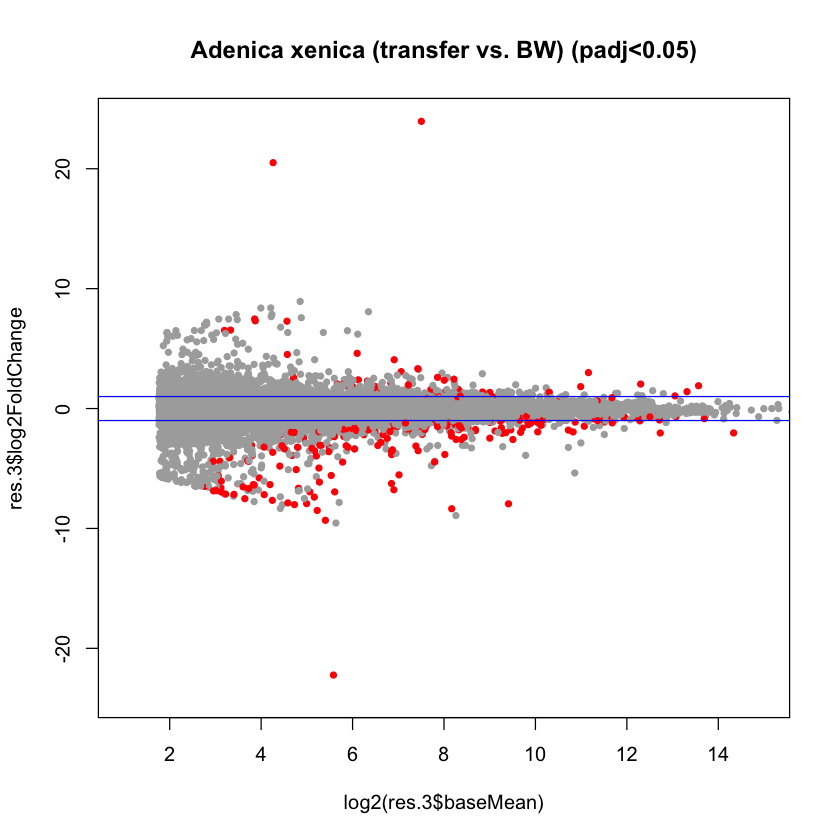

In [13]:
plot(log2(res.3$baseMean), res.3$log2FoldChange, 
     col=ifelse(res.3$padj < 0.05, "red","gray67"),
     main="Adenica xenica (transfer vs. BW) (padj<0.05)",xlim=c(1,15),pch=20,cex=1)
abline(h=c(-1,1), col="blue")

# Overlap of genes in each comparison

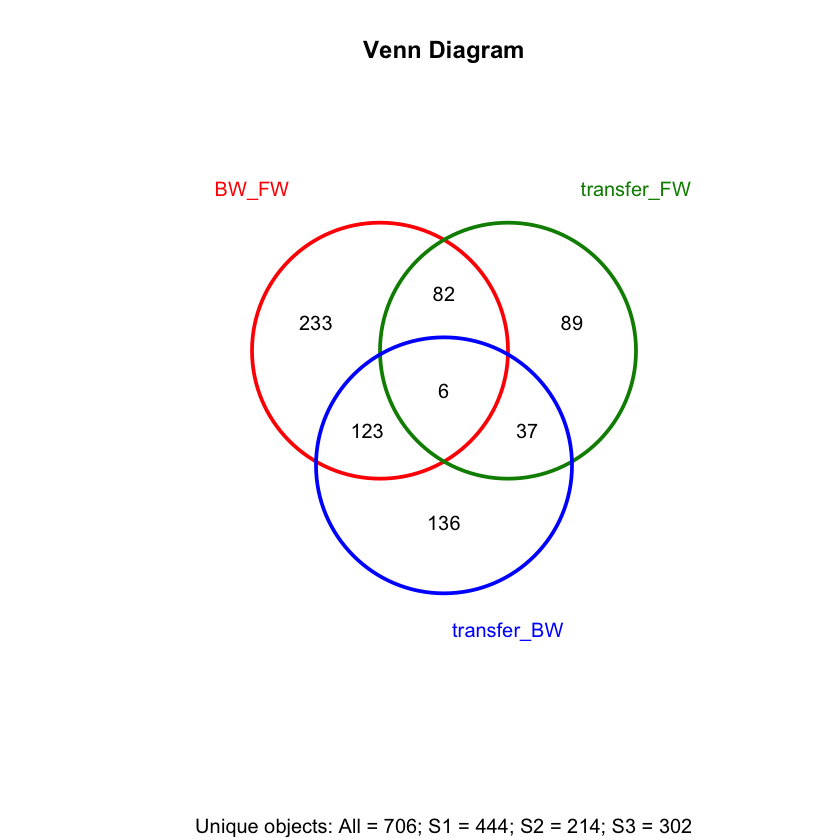

In [14]:
m<-res1_filtered$id
n<-res2_filtered$id
o<-res3_filtered$id
setlist <- list(BW_FW=as.vector(m),transfer_FW=as.vector(n),transfer_BW=as.vector(o))
OLlist <- overLapper(setlist=setlist, sep="", type="vennsets")
counts <- sapply(OLlist$Venn_List, length)
vennPlot(counts=counts)

In [15]:
# extract intersections:
#names(OLlist$Venn_List)
overlap_BW_FWtransfer_FW<-OLlist$Venn_List$BW_FWtransfer_FW
#length(overlap_BW_FWtransfer_FW)
overlap_BW_FWtransfer_BW<-OLlist$Venn_List$BW_FWtransfer_BW
#length(overlap_BW_FWtransfer_BW)
overlap_transfer_FWtransfer_BW<-OLlist$Venn_List$transfer_FWtransfer_BW
#length(overlap_transfer_FWtransfer_BW)
overlap_BW_FW<-OLlist$Venn_List$BW_FW
#length(overlap_BW_FW)
overlap_transfer_FW<-OLlist$Venn_List$transfer_FW
#length(overlap_transfer_FW)
overlap_transfer_BW<-OLlist$Venn_List$transfer_BW
#length(overlap_transfer_BW)
combined_BW_FW<-union(overlap_BW_FW,overlap_BW_FW)
#length(combined_BW_FW)
combined_transfer_FW<-union(overlap_transfer_FW,overlap_transfer_FW)
#length(combined_transfer_FW)
combined_transfer_BW<-union(overlap_transfer_BW,overlap_transfer_BW)
#length(combined_transfer_BW)

# Heatmap, Transfer vs. FW

[1] 89

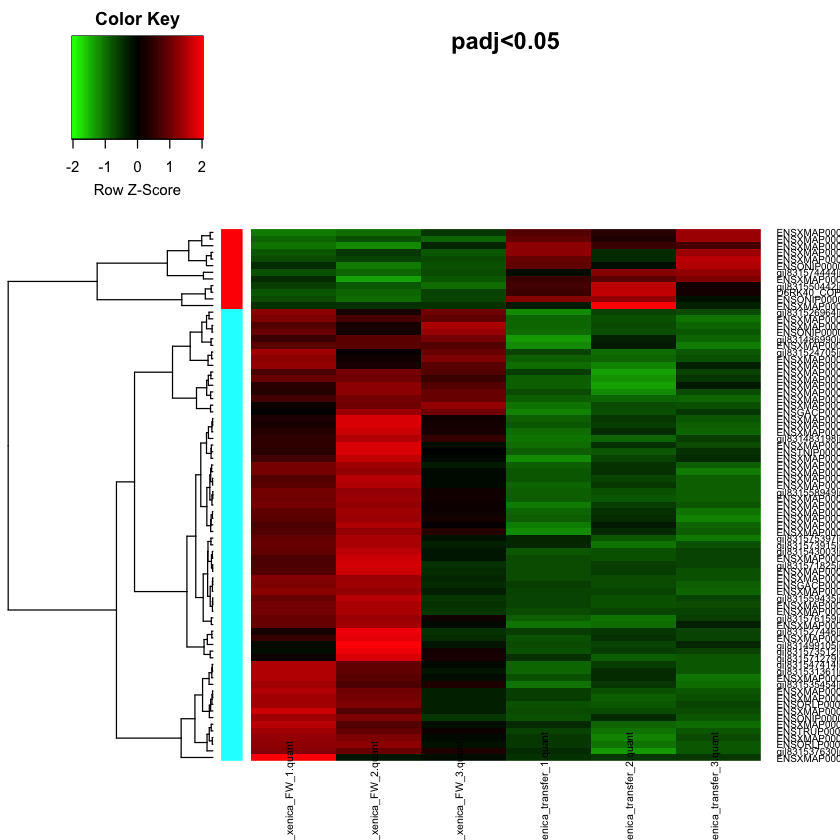

In [16]:
# TR vs. FW samples
counts_TR_FW <- filtered_norm_counts[,c(4:9)]
id <-rownames(counts_TR_FW)
length(combined_transfer_FW)
TR_FW <- counts_TR_FW[rownames(counts_TR_FW) %in% combined_transfer_FW,]
d<-as.matrix(TR_FW)
hr <- hclust(as.dist(1-cor(t(d), method="pearson")), method="complete")
mycl <- cutree(hr, h=max(hr$height/1.5))
clusterCols <- rainbow(length(unique(mycl)))
myClusterSideBar <- clusterCols[mycl]
myheatcol <- greenred(75)
heatmap.2(d, main="padj<0.05", 
          Rowv=as.dendrogram(hr),
          cexRow=0.75,cexCol=0.8,srtCol= 90,
          adjCol = c(NA,0),offsetCol=2.5, 
          Colv=NA, dendrogram="row", 
          scale="row", col=myheatcol, 
          density.info="none", 
          trace="none", RowSideColors= myClusterSideBar)

# Heatmap, Transfer vs. BW

[1] 136

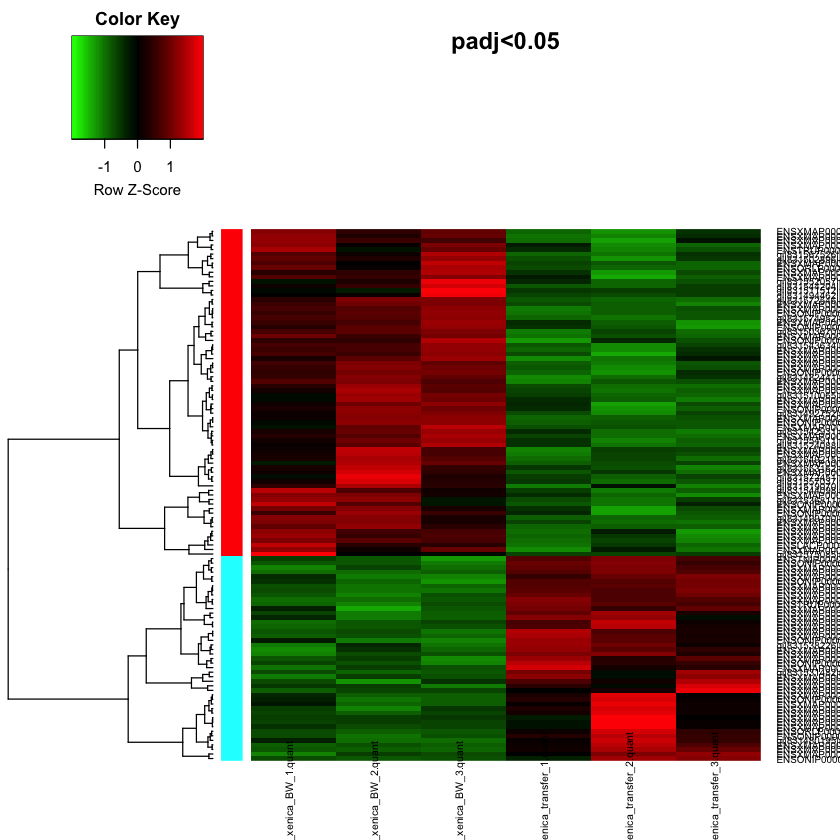

In [17]:
# TR vs. BW samples
counts_TR_BW <- filtered_norm_counts[,c(1,2,3,7,8,9)]
length(combined_transfer_BW)
TR_BW <- counts_TR_BW[rownames(counts_TR_BW) %in% combined_transfer_BW,]
d<-as.matrix(TR_BW)
hr <- hclust(as.dist(1-cor(t(d), method="pearson")), method="complete")
mycl <- cutree(hr, h=max(hr$height/1.5))
clusterCols <- rainbow(length(unique(mycl)))
myClusterSideBar <- clusterCols[mycl]
myheatcol <- greenred(75)
heatmap.2(d, main="padj<0.05", 
          Rowv=as.dendrogram(hr),
          cexRow=0.75,cexCol=0.8,srtCol= 90,
          adjCol = c(NA,0),offsetCol=2.5, 
          Colv=NA, dendrogram="row", 
          scale="row", col=myheatcol, 
          density.info="none", 
          trace="none", RowSideColors= myClusterSideBar)

# Heatmap, BW vs. FW

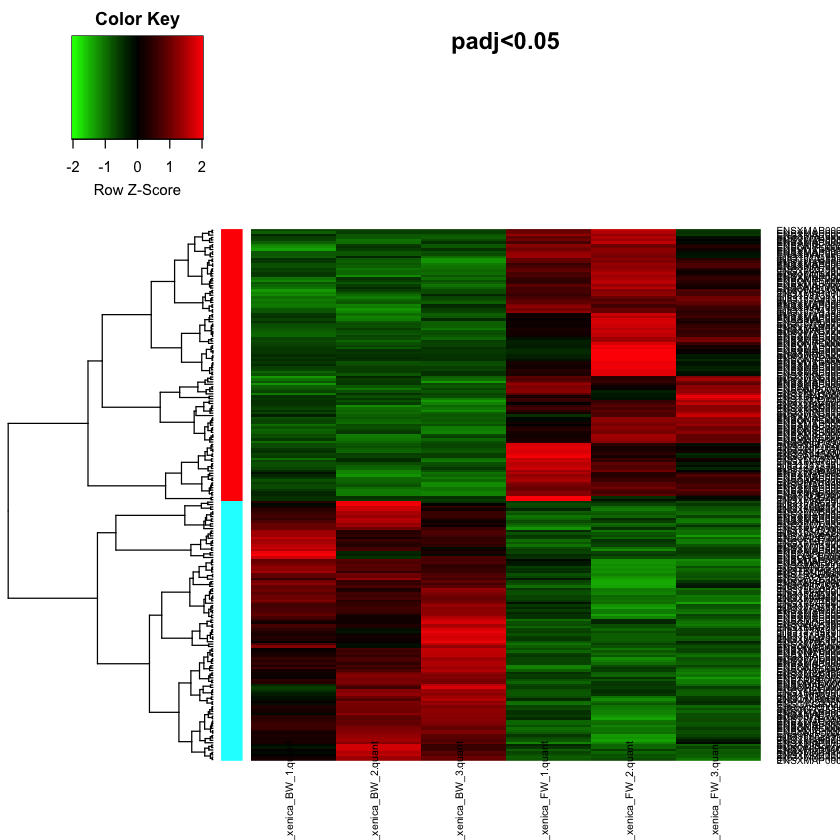

In [18]:
# BW vs. FW samples
counts_BW_FW <- filtered_norm_counts[,c(1:6)]
#length(combined_BW_FW)
BR_FW <- counts_BW_FW[rownames(counts_BW_FW) %in% combined_BW_FW,]
d<-as.matrix(BR_FW)
hr <- hclust(as.dist(1-cor(t(d), method="pearson")), method="complete")
mycl <- cutree(hr, h=max(hr$height/1.5))
clusterCols <- rainbow(length(unique(mycl)))
myClusterSideBar <- clusterCols[mycl]
myheatcol <- greenred(75)
heatmap.2(d, main="padj<0.05", 
          Rowv=as.dendrogram(hr),
          cexRow=0.75,cexCol=0.8,srtCol= 90,
          adjCol = c(NA,0),offsetCol=2.5, 
          Colv=NA, dendrogram="row", 
          scale="row", col=myheatcol, 
          density.info="none", 
          trace="none", RowSideColors= myClusterSideBar)

# Tables

In [19]:
# merge gene_names, counts, and results for TR vs. BW, TR vs. FW, and BW vs. FW in one massive table
res.1<-as.data.frame(res.1)# BW vs. FW
cols<-c("baseMean_BW_v_FW","log2FC_BW_v_FW","lfcSE_BW_v_FW","stat_BW_v_FW","pvalue_BW_v_FW","padj_BW_v_FW")
colnames(res.1)<-cols
res.2<-as.data.frame(res.2)# TR vs. FW
cols<-c("baseMean_TR_v_FW","log2FC_TR_v_FW","lfcSE_TR_v_FW","stat_TR_v_FW","pvalue_TR_v_FW","padj_TR_v_FW")
colnames(res.2)<-cols
res.3<-as.data.frame(res.3)# TR vs. BW
cols<-c("baseMean_TR_v_BW","log2FC_TR_v_BW","lfcSE_TR_v_BW","stat_TR_v_BW","pvalue_TR_v_BW","padj_TR_v_BW")
colnames(res.3)<-cols
res.3<-as.data.frame(res.3)# TR vs. BW
#dim(counts_table)
GeneID<-rownames(res.1)
BW_FW_results<-cbind(res.1,GeneID)
GeneID<-rownames(res.2)
TR_FW_results<-cbind(res.2,GeneID)
GeneID<-rownames(res.3)
TR_BW_results<-cbind(res.3,GeneID)
GeneID<-rownames(counts_table)
counts_table_all<-cbind(counts_table,GeneID)
cols<-c("Row","Trinity_contigID","Trinity_gene","Trinity_gene2","dammit_ID","GeneID","dammit_ID2","NCBI_Fhet")
colnames(gene_names)<-cols
all_matrix<-merge(counts_table_all,TR_FW_results,by="GeneID")
all_matrix<-merge(all_matrix,TR_BW_results,by="GeneID")
all_matrix<-merge(all_matrix,BW_FW_results,by="GeneID")
all_matrix<-merge(all_matrix,gene_names,by="GeneID")
all_matrix <- all_matrix[,c(1:28,30,31,33,35)]
all_matrix <- all_matrix[order(all_matrix$padj_TR_v_FW),]
#write.csv(all_matrix,"~/Documents/UCDavis/Whitehead/RNAseq_15killifish/DE_results/A_xenica_DE_all.csv")
TR_BW_all<-all_matrix[all_matrix$GeneID %in% combined_transfer_BW,]
TR_BW_all <- TR_BW_all[order(TR_BW_all$padj_TR_v_BW),]
#write.csv(TR_BW_all,"~/Documents/UCDavis/Whitehead/RNAseq_15killifish/DE_results/A_xenica_DE_TR_BW.csv")
TR_FW_all<-all_matrix[all_matrix$GeneID %in% combined_transfer_FW,]
TR_FW_all <- TR_FW_all[order(TR_FW_all$padj_TR_v_FW),]
#write.csv(TR_FW_all,"~/Documents/UCDavis/Whitehead/RNAseq_15killifish/DE_results/A_xenica_DE_TR_FW.csv")
BW_FW_all<-all_matrix[all_matrix$GeneID %in% combined_BW_FW,]
BW_FW_all <- BW_FW_all[order(BW_FW_all$padj_BW_v_FW),]
#write.csv(BW_FW_all,"~/Documents/UCDavis/Whitehead/RNAseq_15killifish/DE_results/A_xenica_DE_BW_FW.csv")

# Version Info

In [20]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-apple-darwin14.5.0 (64-bit)
Running under: macOS High Sierra 10.13.3

Matrix products: default
BLAS: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libLAPACK.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] lattice_0.20-34            genefilter_1.60.0         
 [3] tximport_1.6.0             gplots_3.0.1              
 [5] RColorBrewer_1.1-2         DESeq2_1.18.1             
 [7] SummarizedExperiment_1.8.0 DelayedArray_0.4.1        
 [9] matrixStats_0.52.2         Biobase_2.38.0            
[11] GenomicRanges_1.30.0       GenomeInfoDb_1.14.0       
[13] IRanges_2.12.0             S4Vectors